# Pouls Sanguin

**Objectif** : On s'intéresse à la modélisation, l'étude mathématique et la simulation numérique d'un aspect particulier de la circulation sanguine : le pouls.

**Hypothèses** : On va ne considérer qu'une seule artère rectiligne de longueur $L$, modélisée par un tuyau élastique à section circulaire. L'aire $A(t,\xi)$ d’une section de l'artère dépend du temps $t$ et de sa position $\xi$ sur l’axe $[0,L]$.


# I-Modélisation


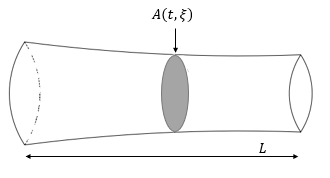

La linéarisation conduit au système suivant :
\begin{array}{ll}
         \frac{\partial \alpha}{\partial t}+ \frac{\partial q}{\partial x} & = 0\\
         \frac{\partial q}{\partial t}+ \frac{A_0 \hat p ' (A_0)}{\rho_0}.\frac{\partial \alpha}{\partial x} & = 0 \end{array} 
En dérivant les deux équations par rapport à $t$ et $x$ respectivement, on obtient :
    $$\frac{\partial ^2 u}{\partial t^2}-c^2 \frac{\partial ^2 u}{\partial x^2}= 0$$

         

Application: l'aorte est l'artère principale de l'organisme, qui amène le sang depuis le coeur vers tous les territoires du corps

In [1]:
import numpy as np
import matplotlib.pyplot as plt

E=10**6 ; h=10**(-3); r=10**(-2); rho=10**(3)
c=np.sqrt(E*h/(2*rho*r))
f=1
l=c/f
print ('Vitesse de propagation :', c,'m/s')
print ('Longuer d\'onde :', l,'m')

Vitesse de propagation : 7.0710678118654755 m/s
Longuer d'onde : 7.0710678118654755 m


**Rque:** 7m est largement supérieur à la longueur de toute artère ce qui signifie qu'à l’échelle d’une artère, on ne voit pas le pouls se propager.

# II-Simulation

Après simplification, on s'interesse à la resolution de ce système par la méthode de difference finie :

In [3]:
rho=1
def G(t):
    return np.array([1+0.2*np.sin(10*t),0.22+0.2*np.sin(10*t)])

def f(U):
    def p(A):
        return A-1
    return np.array([U[1],U[1]**2/U[0]+U[0]*p(U[0])/rho])
def Lax_Friedrichs(f,dt,L,M,T):
    dx = L/(M+1)
    lamda = dt/dx
    U=np.array([[1,0.22] for i in range(M+2)])
    t=0
    while t < T :
        U_=U.copy()
        U[0]=G(t)
        for j in range (1,M+1):
            U[j]=(U_[j+1]+U_[j-1])/2-lamda*(f(U_[j+1])-f(U_[j-1]))/2
        U[M+1]=U_[M+1]-(f(U_[M+1])-f(U_[M]))*lamda
        t+=dt
    return U

0.6565


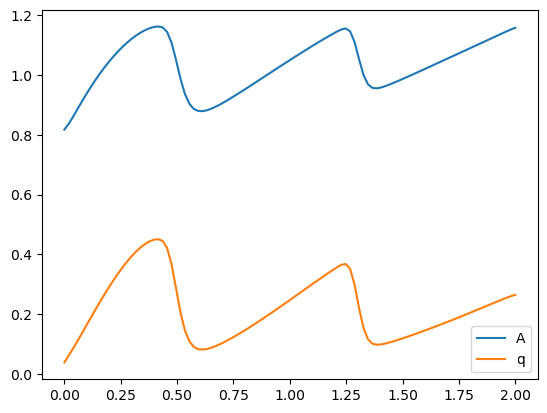

In [4]:
L  = 2 ; M  = 100 ;  T = 4.2 ;dt = 0.013
dx = L/(M+1)
print (dt/dx)
X=[j*dx for j in range(M+2)]

U=Lax_Friedrichs(f,dt,L,M,T)
plt.plot(X,U[:,0],label="A")
plt.plot(X,U[:,1],label="q")
#plt.plot(X,U[:,1]/U[:,0],label="w")
plt.legend()
plt.show()

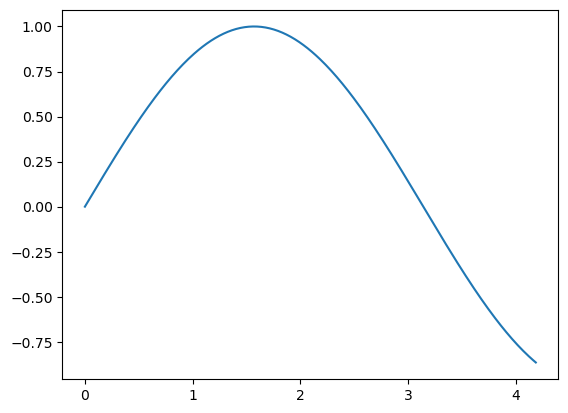

In [5]:
t1=[j*dt for j in range(int(T/dt))]
plt.plot(t1,np.sin(t1))
plt.show()

#### Avec pas de temps supérieur à 0.013 :

0.707


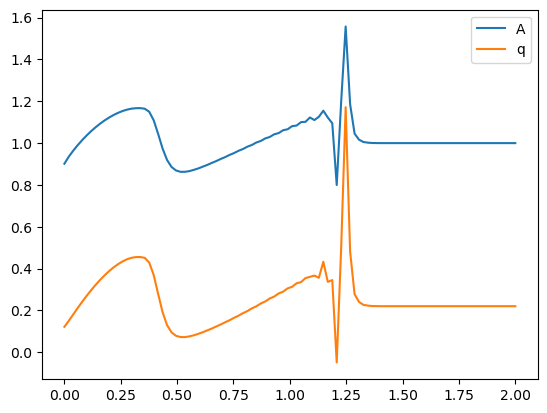

In [6]:
T = 1 ;dt = 0.014
dx = L/(M+1)
print (dt/dx)
X=[j*dx for j in range(M+2)]
U=Lax_Friedrichs(f,dt,L,M,T)
plt.plot(X,U[:,0],label="A")
plt.plot(X,U[:,1],label="q")
#plt.plot(X,U[:,1]/U[:,0],label="w")
plt.legend()
plt.show()

**Cas linéaire (système 8)**

1.01


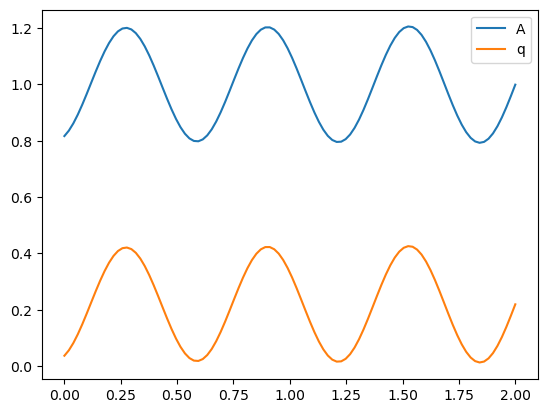

In [7]:
dt = 0.02 ; c = 1 ; T=4.2
def fl(U):
    return np.array([U[1],c*U[0]])
print (dt/dx)
phi=0
def exact(t,x):
    return 1+0.2*np.sin(10*t)*np.cos(10*x+phi)/np.cos(phi)



X=[j*dx for j in range(M+2)]
U=Lax_Friedrichs(fl,dt,L,M,T)
Ae=[exact(T,j*dx) for j in range(M+2)]
qe=[exact(T,j*dx)-1+0.22 for j in range(M+2)]
#plt.plot(X,qe,label="q exact")
#plt.plot(X,Ae,label="A exact")
plt.plot(X,U[:,0],label="A")
plt.plot(X,U[:,1],label="q")
#plt.plot(X,U[:,1]/U[:,0],label="w")
plt.legend()
plt.show()

#### Avec pas de temps supérieur à 0.02 :

1.0605


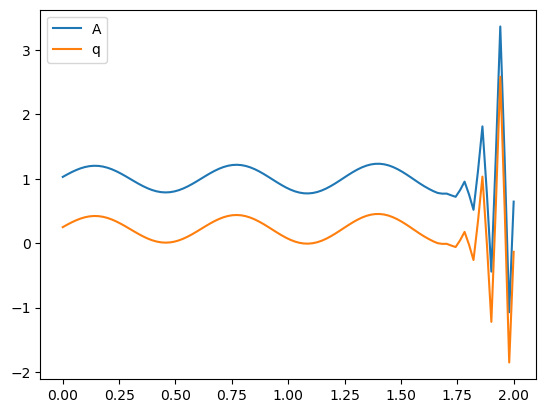

In [8]:
dt = 0.021; c = 1 ; T=2.2
def fl(U):
    return np.array([U[1],c*U[0]])
print (dt/dx)
X=[j*dx for j in range(M+2)]
U=Lax_Friedrichs(fl,dt,L,M,T)
plt.plot(X,U[:,0],label="A")
plt.plot(X,U[:,1],label="q")
#.plot(X,U[:,1]/U[:,0],label="w")
plt.legend()
plt.show()

Pour que ce schéma converge il faut que dt/dx soit inférieure à 1 (CFL condition)